## Image

In [34]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# config path
name_image = 'nt-72.jpg'
root_img = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/' + name_image
mask_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + name_image
ms_nt_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/ms-nt/' + name_image

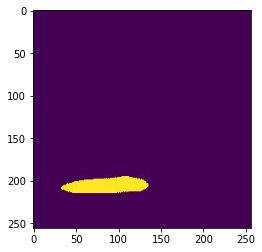

In [36]:
# read it
img = plt.imread(mask_pred) 
#convert img to grey
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# set a thresh
thresh = 100
#get threshold image
ret, thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(img)
plt.show()

## Find contours and detect nt point

In [37]:
def saveIt(img, name):
    plt.imsave('C:/Users/Thep Ho/Desktop/Thesis/z-results' + '/'  +  name, img)

# draw a line from vector and point
def drawLine(img, Vx, Vy, Px, Py):
    _, cols = img.shape[:2]
    lefty = int((-Px*Vy/Vx) + Py)
    righty = int(((cols-Px)*Vy/Vx)+Py)
    cv2.line(img, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

In [38]:
root_height, root_weight = img.shape[:2]
print('root_height:', root_height)
print('root_weight:', root_weight)

#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# tìm vector và điểm của fitline
[fit_line_vx, fit_line_vy, fit_line_x, fit_line_y] = cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)

# Kẻ đường vuông góc với fitline
percentage_line_vx, percentage_line_vy = -fit_line_vy, fit_line_vx

root_height: 256
root_weight: 256


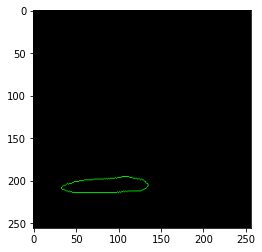

In [39]:
# contours mask
img_contours_mask = np.zeros(img.shape, np.uint8)
contour_img = np.zeros(img.shape, np.uint8)

cv2.drawContours(img_contours_mask, contours, -1, (0, 255, 0), 1)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

plt.imshow(img_contours_mask)
plt.show()

In [40]:
# centroid, area and max width, height
centroid = []
for c in contours:
    # find the center of the contour
    m = cv2.moments(c)
    centroid.append(int(m['m10']/m['m00']))
    centroid.append(int(m['m01']/m['m00']))

    # extract roi
    x, y, w, h = cv2.boundingRect(c)
    break
print(centroid)

[86, 205]


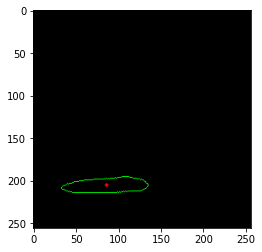

In [41]:
# draw centroid
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
plt.show()

Text(0.5, 1.0, 'Centroid')

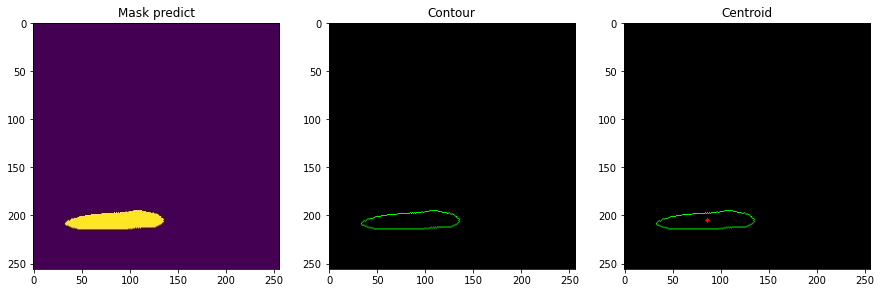

In [42]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img)
arr[0].set_title('Mask predict')
arr[1].imshow(contour_img)
arr[1].set_title('Contour')
arr[2].imshow(img_contours_mask)
arr[2].set_title('Centroid')
# fig.savefig('Ảnh từ mask sang contour.png')

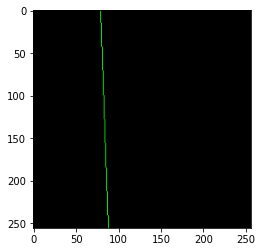

In [43]:
# Kẻ đường vuông góc với fitline và đi qua centroid point
line_mask = np.zeros(img.shape, np.uint8)
drawLine(line_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imshow(line_mask)
plt.show()

In [44]:
# Tìm giao điểm của đường vuông góc của fitline và 2 cạnh của nt_mask
img_contours_mask = np.array(img_contours_mask)
line_mask = np.array(line_mask)

rows, cols, _ = img.shape
nt_points = []

for i in range(0, rows):
    for j in range(0, cols):
        if img_contours_mask[i][j][1] == 255 and line_mask[i][j][1] == 255:
            nt_points.append([i, j])
            
print('len: ', len(nt_points))
print('nt_points: ', nt_points)

len:  2
nt_points:  [[197, 86], [214, 87]]


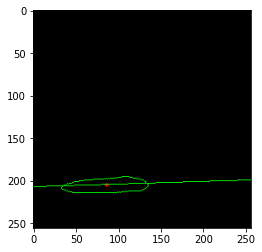

In [45]:
# draw fitline to contours 
drawLine(img_contours_mask, fit_line_vx, fit_line_vy, fit_line_x, fit_line_y)
plt.imshow(img_contours_mask)
plt.show()
# plt.imsave('6-1.png', img_contours_mask)

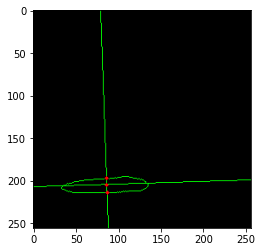

In [46]:
# draw percentage line to the contours mask
drawLine(img_contours_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imsave('5.png', img_contours_mask)
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
# draw nt points
cv2.circle(img_contours_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(img_contours_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
# plt.imsave('4-2.png', img_contours_mask)

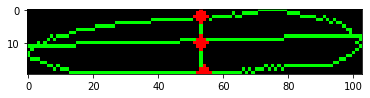

In [19]:
ROI = img_contours_mask[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()

## Result

In [20]:
root_img = plt.imread(root_img)
nt_mask = np.zeros(img.shape, np.uint8)

# visualize nt_mask
cv2.drawContours(nt_mask, contours, -1, (0, 255, 0), 1)
cv2.circle(nt_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(nt_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(nt_mask, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

# visualize root_img
cv2.drawContours(root_img, contours, -1, (0, 255, 0), 1)
cv2.circle(root_img, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(root_img, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(root_img, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

array([[[ 48,  47,  45],
        [ 47,  46,  44],
        [ 45,  44,  42],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 48,  47,  45],
        [ 47,  46,  44],
        [ 45,  44,  42],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 45,  44,  42],
        [ 45,  44,  42],
        [ 43,  42,  40],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 25,  23,  24],
        [ 24,  22,  23],
        [ 23,  21,  22],
        ...,
        [108,  96,  96],
        [106,  94,  94],
        [104,  92,  92]],

       [[ 29,  27,  28],
        [ 29,  27,  28],
        [ 27,  25,  26],
        ...,
        [103,  91,  91],
        [102,  90,  90],
        [101,  89,  89]],

       [[ 32,  30,  31],
        [ 31,  29,  30],
        [ 30,  28,  29],
        ...,
        [ 99,  87,  87],
        [100,  88,  88],
        [100,  88,  88]]

In [21]:
plt.imsave('7.png', nt_mask)
plt.imsave('8.png', root_img)

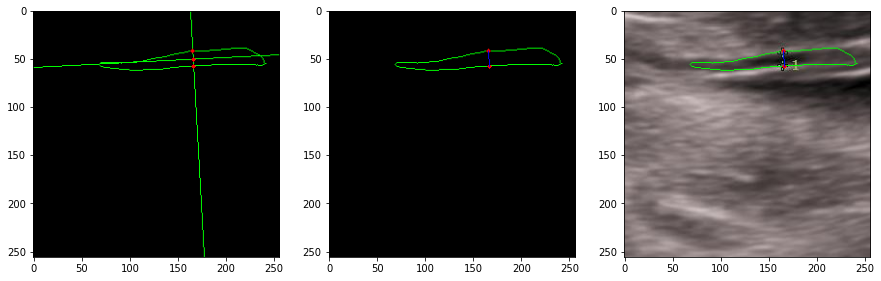

In [66]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img_contours_mask)
arr[1].imshow(nt_mask)
arr[2].imshow(root_img)

In [49]:
fig.savefig('Ảnh xác định NT cuối cùng - 3.png')

In [724]:
# DPI (dots per inch) số điểm trên 1 inch, số pixel trên 1 inch
# CV2 không quan tâm tới chỉ số DPI, nó chỉ làm việc với ma trận điểm ảnh
# Tọa độ nhận được của 2 điểm nt là tọa độ pixel trên điểm ảnh vì thế
# Công thức chuyển đổi từ tọa độ pixel sang tọa độ thực với đơn vị mm như sau:

# X_px = X_inch * DPI
# X_inch = DPI / X_px
# X_mm = X_inch * 25.4
im = Image.open('0.png')
DPI = im.info['dpi']

inch_to_mm = 25.4

def mDistance(x1, y1, x2, y2):
    x1 = (x1/DPI[0])*inch_to_mm
    y1 = (x2/DPI[0])*inch_to_mm
    x2 = (y1/DPI[0])*inch_to_mm
    y2 = (y2/DPI[0])*inch_to_mm
    return (((x1 - x2)**2 + (y1 - y2)**2)**0.5)

(x1, y1, x2, y2) = (nt_points[0][0], nt_points[0][1], nt_points[1][0], nt_points[1][1]) (x1, y1, x2, y2))

if (x1 < DPI[0] or x2 < DPI[0]):
    x1 = 256 - x1
    x2 = 256 - x2
if (y1 < DPI[1] or y2 < DPI[1]):
    y1 = 256 - y1
    y2 = 256 - y2

nt1 = round(mDistance(x1, y1, x2, y2), 3)
print('nt1: ', nt1, 'mm')

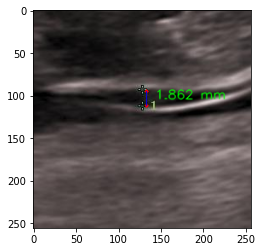

In [690]:
x = round((x1 + x2)/2)
y = round((y1 + y2)/2)
image = cv2.putText(root_img, str(nt1) + ' mm', (y + 10, 256 - x), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(image)

### Save fig for theiss

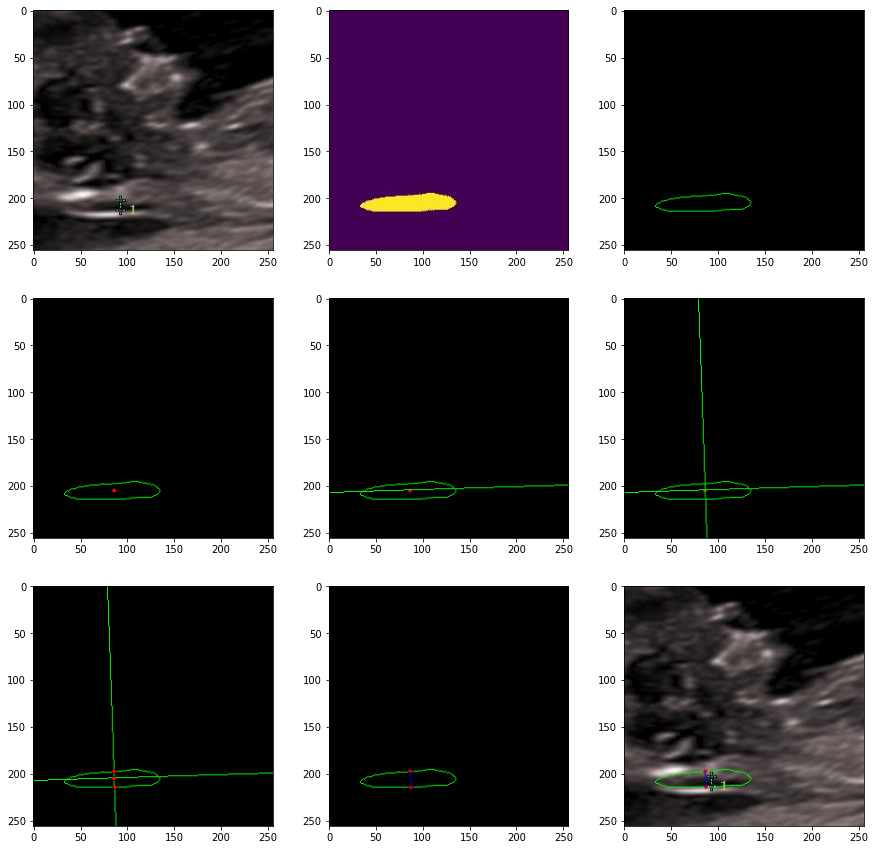

In [47]:
# arr[0].set_title('Processed image')
fig, arr = plt.subplots(3, 3, figsize=(15, 15))
arr[0][0].imshow(plt.imread('0.jpg'))
arr[0][1].imshow(plt.imread('1.png'))
arr[0][2].imshow(plt.imread('2.png'))
arr[1][0].imshow(plt.imread('3.png'))
arr[1][1].imshow(plt.imread('4.png'))
arr[1][2].imshow(plt.imread('5.png'))
arr[2][0].imshow(plt.imread('6.png'))
arr[2][1].imshow(plt.imread('7.png'))
arr[2][2].imshow(plt.imread('8.png'))
fig.savefig('sp4.png')